# Diabetic Retinopathy using CNN_Inception
Class 0 - No DR
Class 1 - Mild
Class 2 - Moderate
Class 3 - Severe
Class 4 - Proliferative DR




In [ ]:
# importing the needed model,libaries
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive # giving the access to connect with the google drive
drive.mount('/content/drive')  #mounted means the connection is done succesfully

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set data directory path from the right side file .where u uploaded
data_dir = '/content/drive/MyDrive/Diabetic retina/training_data_set'  # Update with the correct path to your dataset

# Image size and batch size for Inception models
img_size = (299, 299)
batch_size = 32       # batch sizes commonly we use 32,64
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True
#rotation_range = 20
#width_shift_range = 0.2
#height_shift_range = 0.2

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 80% training, 20% validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Display class indices
print("Class Indices:", train_generator.class_indices)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Class Indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


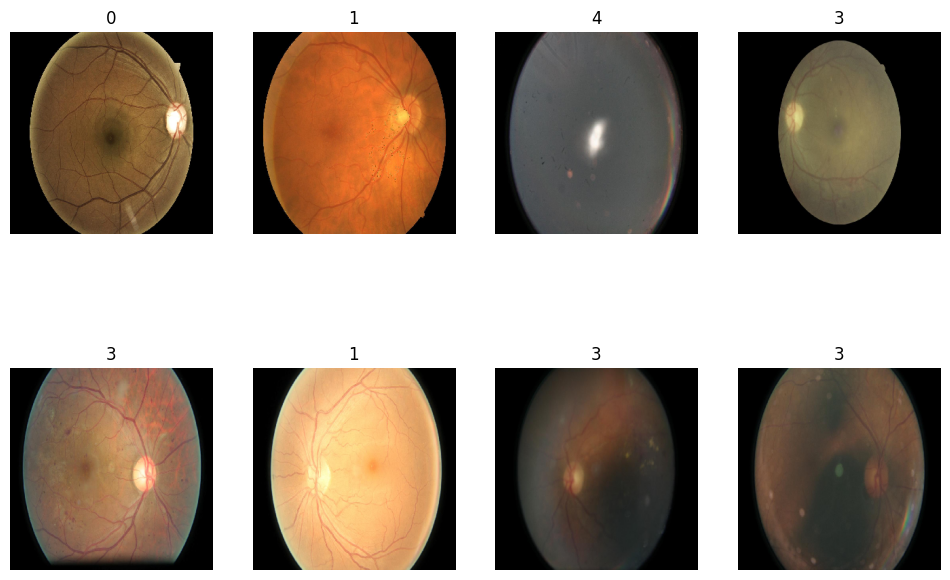

In [ ]:
# Function to display images from the generator
def display_images(generator):
    images, labels = next(generator)  # Get the next batch of images and labels
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(min(8, len(images))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i].argmax()])
        plt.axis('off')
    plt.show()

# Display sample images from the training set
display_images(train_generator)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Feature Extraction: Convolutional layers
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),

        # Fully Connected Layers
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Softmax for categorical classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
                  metrics=['accuracy'])

    return model

# Example usage
input_shape = (299, 299, 3)
#num_classes = 10
num_classes = len(train_generator.class_indices)
model = create_cnn_model(input_shape, num_classes)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)                  │ (None, 299, 299, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 149, 149, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 74, 74, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,523,717 (85.92 MB)

 Trainable params: 22,523,717 (85.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


# Train the model
CNN = model.fit(train_generator, validation_data=validation_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 374ms/step - accuracy: 0.3626 - loss: 1.5980 - val_accuracy: 0.5340 - val_loss: 1.0335
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.5396 - loss: 1.0683 - val_accuracy: 0.5540 - val_loss: 0.9959
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 355ms/step - accuracy: 0.5731 - loss: 1.0323 - val_accuracy: 0.5720 - val_loss: 1.0297
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - accuracy: 0.5523 - loss: 1.0069 - val_accuracy: 0.6100 - val_loss: 0.9460
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 338ms/step - accuracy: 0.6224 - loss: 0.9324 - val_accuracy: 0.6040 - val_loss: 0.9686


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.6166 - loss: 0.9668
Validation loss: 0.9685845971107483
Validation accuracy: 0.6039999723434448


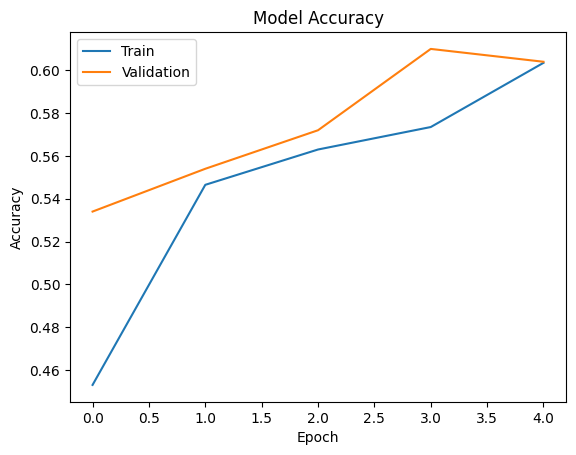

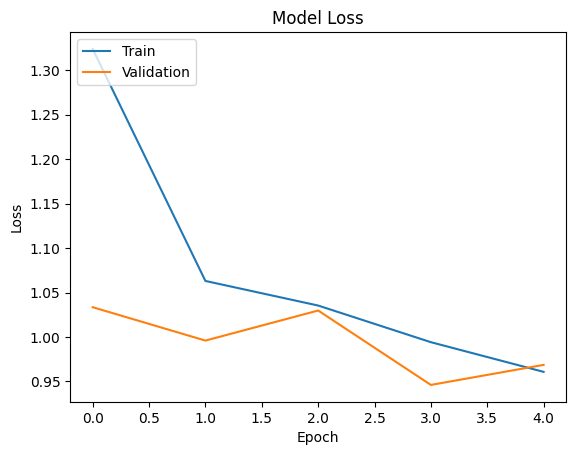

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

# Plot training and validation accuracy
plt.plot(CNN.history['accuracy']) # Changed from history.CNN to CNN.history
plt.plot(CNN.history['val_accuracy']) # Changed from history.CNN to CNN.history
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(CNN.history['loss']) # Changed from history.CNN to CNN.history
plt.plot(CNN.history['val_loss']) # Changed from history.CNN to CNN.history
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# building the model with the Dense of the 1024 means neuron connection in order
from tensorflow.keras.layers import Dropout,BatchNormalization
def build_inception_v3(input_shape=(299, 299, 3), num_classes=5):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x=BatchNormalization()(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

def build_inception_v2(input_shape=(299, 299, 3), num_classes=5):
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x=BatchNormalization()(x)
    x = Dense(500, activation='relu')(x)
    x=BatchNormalization()(x)
    Dropout(0.5)(x)
    x=BatchNormalization()(x)
    Dropout(0.5)(x)
    x=BatchNormalization()(x)
    x=BatchNormalization()(x)


    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base layers
    for layer in base_model.layers:
        layer.trainable = False

    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
]

In [ ]:
# Function to train and evaluate a model
def train_and_evaluate(model, model_name, train_generator, validation_generator, epochs=5):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    print(f"\nTraining {model_name}...")

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        # Pass callbacks to model.fit
    )
    print(f"{model_name} Training completed.")

    # Plot training history
    plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    print("Training & Evaluation completed")



Training Inception v3...
Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 618ms/step - accuracy: 0.4909 - loss: 1.2820 - val_accuracy: 0.5860 - val_loss: 1.1290
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 355ms/step - accuracy: 0.7227 - loss: 0.6895 - val_accuracy: 0.6480 - val_loss: 0.9738
Inception v3 Training completed.


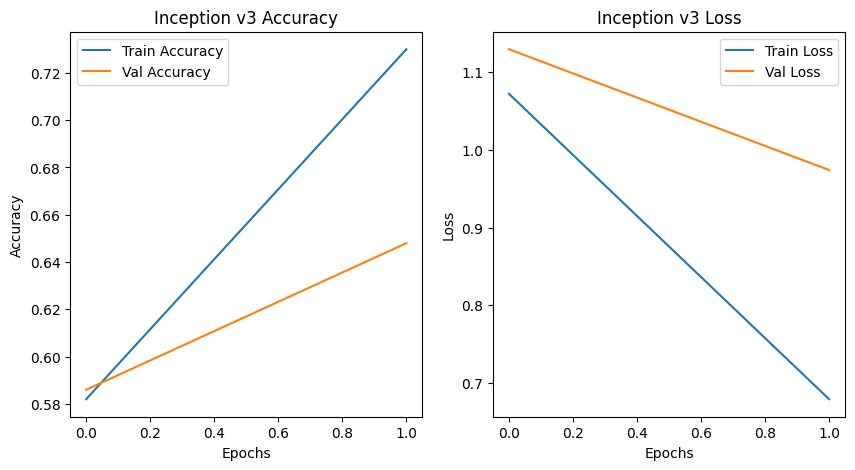

Training & Evaluation completed


In [ ]:
# Build Inception v3 model
inception_v3_model = build_inception_v3(num_classes=len(train_generator.class_indices))

# Train and evaluate Inception v3
train_and_evaluate(inception_v3_model, 'Inception v3', train_generator, validation_generator, epochs=10)


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training Inception v2...
Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 923ms/step - accuracy: 0.4870 - loss: 1.3351 - val_accuracy: 0.4840 - val_loss: 1.2263
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.7207 - loss: 0.7316 - val_accuracy: 0.5400 - val_loss: 1.0714
Inception v2 Training completed.


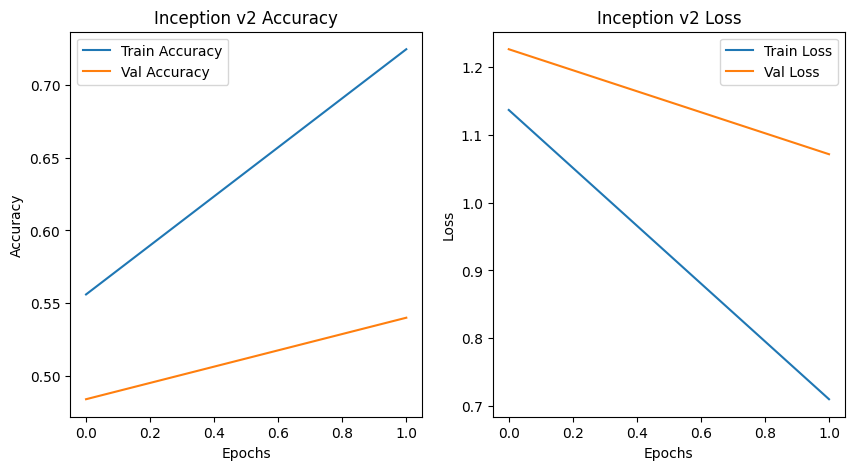

Training & Evaluation completed


In [ ]:
# Build Inception v2 model
inception_v2_model = build_inception_v2(num_classes=len(train_generator.class_indices))

# Train and evaluate Inception v2
train_and_evaluate(inception_v2_model, 'Inception v2', train_generator, validation_generator, epochs=10)


In [ ]:
# Save the Inception v3 model
inception_v3_model.save('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v3_model.h5')

# Save the Inception v2 model
inception_v2_model.save('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v2_model.h5')
# save the CNN model
model.save('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/cnn_model.h5')

In [ ]:

# Save the Inception v3 model
inception_v3_model.save('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v3_model.keras')

# Save the Inception v2 model
inception_v2_model.save('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v2_model.keras')
# save the CNN model
cnn_model.save('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/cnn_model.keras')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
# Load the model with the correct .h5 extension and path
model = load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v3_model.h5')
# Preprocess image
image = load_img(r'/content/drive/MyDrive/Diabetic retina/training_data_set/3/1002_left.jpeg', target_size=(299, 299))
#image = load_img(r'/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/testing_dataset/0/662_right.jpeg', target_size=(299, 299))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Predict
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)

# Map to class name
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
predicted_class_name = class_names[predicted_class[0]]

print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted class: 1


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import os

# Load the model with the correct .h5 extension and path
model = load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v3_model.h5')

# Define the class mapping (use the actual class indices or update accordingly)
class_indices = {0: 'NO_dr', 1: 'Mild',2:'Moderate',3:'Severe',4:'Proliferative',}


# Function to preprocess multiple images
def preprocess_images(image_paths, target_size=(299, 299)):
    images = []
    for img_path in image_paths:
        image = load_img(img_path, target_size=target_size)
        image_array = img_to_array(image) / 255.0  # Normalize the image
        images.append(image_array)
    return np.array(images)

# List of image paths (both left and right images)
image_paths = [
    r'/content/drive/MyDrive/Diabetic retina/training_data_set/0/10173_left.jpeg',
    r'/content/drive/MyDrive/Diabetic retina/training_data_set/0/10223_left.jpeg'
]

# Preprocess images
image_batch = preprocess_images(image_paths)

# Predict for the batch of images
predictions = model.predict(image_batch)

# Interpret the predictions and map them to class names
predicted_classes = np.argmax(predictions, axis=1)

# Print out the predicted class for each image
for i, img_path in enumerate(image_paths):
    predicted_class_name = class_indices.get(predicted_classes[i], "Unknown class")
    print(f"Image: {os.path.basename(img_path)} - Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Image: 10173_left.jpeg - Predicted class: Mild
Image: 10223_left.jpeg - Predicted class: NO_dr


In [ ]:
# prompt: take the path from my drive  model is saved and predict it the result

# Load the trained model
model = load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/cnn_model.keras')
# Define class mapping from the original dataset
class_indices = {0: 'NO_DR', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative_DR'}

# Function to preprocess images
def preprocess_images(image_paths, target_size=(299, 299)):
    images = []
    for img_path in image_paths:
        image = load_img(img_path, target_size=target_size)
        image_array = img_to_array(image) / 255.0  # Normalize the image
        images.append(image_array)
    return np.array(images)

# Path to the image you want to predict - Update with the actual image path
image_path = '/content/drive/MyDrive/Diabetic retina/training_data_set/3/1002_left.jpeg'  # Replace 'image1.jpg' with the actual image filename
image_path = '/content/drive/MyDrive/Diabetic retina/training_data_set/3/1008_left.jpeg'  # Replace 'image1.jpg' with the actual image filename

# Preprocess the image
image_batch = preprocess_images([image_path])

# Make the prediction
predictions = model.predict(image_batch)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map the predicted class index to the class name
predicted_class_name = class_indices.get(predicted_class_index, "Unknown Class")

# Print the prediction
print(f"Image: {os.path.basename(image_path)} - Predicted Class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Image: 1008_left.jpeg - Predicted Class: Proliferative_DR


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import os

# Load the trained model
model = model = load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/cnn_model.h5')

# Define class mapping from the original dataset
class_indices = {0: 'NO_DR', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative_DR'}

# Function to preprocess images
def preprocess_images(image_paths, target_size=(299, 299)):
    images = []
    for img_path in image_paths:
        image = load_img(img_path, target_size=target_size)
        image_array = img_to_array(image) / 255.0  # Normalize the image
        images.append(image_array)
    return np.array(images)

# Path to testing dataset folder
testing_folder = r'/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/sample_testing_images/retina_test_images'

# Collect all image paths from the testing dataset
test_image_paths = []
for root, _, files in os.walk(testing_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure valid image formats
            test_image_paths.append(os.path.join(root, file))

# Process images in batches of 10
batch_size = 10
for i in range(0, len(test_image_paths), batch_size):
    batch_paths = test_image_paths[i:i+batch_size]
    image_batch = preprocess_images(batch_paths)

    # Predict for the batch of images
    predictions = model.predict(image_batch)

    # Interpret the predictions and map them to class labels
    predicted_classes = np.argmax(predictions, axis=1)

    # Print out the predicted class for each image in the batch
    for j, img_path in enumerate(batch_paths):
        predicted_class_name = class_indices.get(predicted_classes[j], "Unknown Class")
        print(f"Image: {os.path.basename(img_path)} - Predicted Class: {predicted_class_name}")



Evaluating Inception V3...

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 675ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 489ms/step - accuracy: 0.6546 - loss: 0.9669
Inception V3 - Test Accuracy: 64.80%


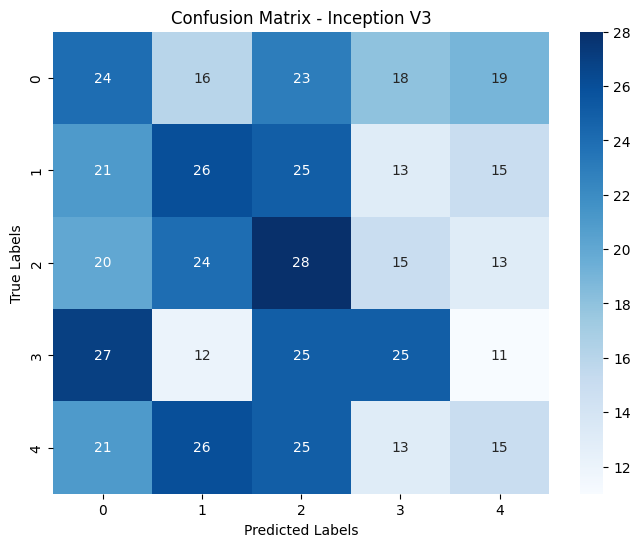


Classification Report for Inception V3:

              precision    recall  f1-score   support

           0       0.21      0.24      0.23       100
           1       0.25      0.26      0.25       100
           2       0.22      0.28      0.25       100
           3       0.30      0.25      0.27       100
           4       0.21      0.15      0.17       100

    accuracy                           0.24       500
   macro avg       0.24      0.24      0.23       500
weighted avg       0.24      0.24      0.23       500


Evaluating Inception V2...

16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 755ms/step - accuracy: 0.5158 - loss: 1.0836
Inception V2 - Test Accuracy: 54.00%


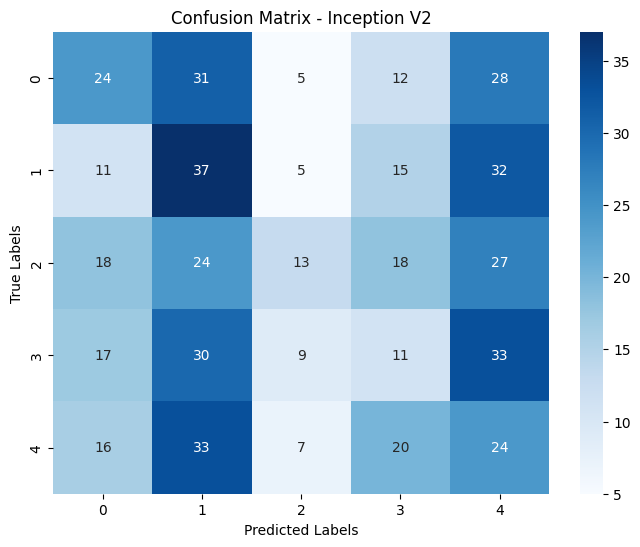


Classification Report for Inception V2:

              precision    recall  f1-score   support

           0       0.28      0.24      0.26       100
           1       0.24      0.37      0.29       100
           2       0.33      0.13      0.19       100
           3       0.14      0.11      0.12       100
           4       0.17      0.24      0.20       100

    accuracy                           0.22       500
   macro avg       0.23      0.22      0.21       500
weighted avg       0.23      0.22      0.21       500


Evaluating CNN Model...

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 674ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 494ms/step - accuracy: 0.6362 - loss: 0.9837
CNN Model - Test Accuracy: 64.80%


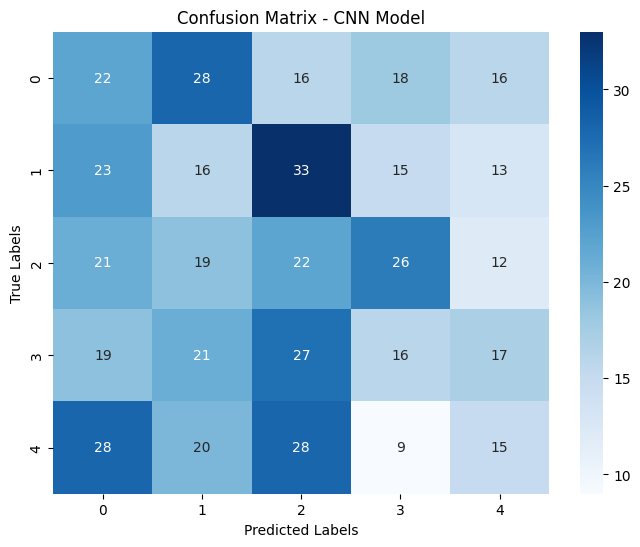


Classification Report for CNN Model:

              precision    recall  f1-score   support

           0       0.19      0.22      0.21       100
           1       0.15      0.16      0.16       100
           2       0.17      0.22      0.19       100
           3       0.19      0.16      0.17       100
           4       0.21      0.15      0.17       100

    accuracy                           0.18       500
   macro avg       0.18      0.18      0.18       500
weighted avg       0.18      0.18      0.18       500



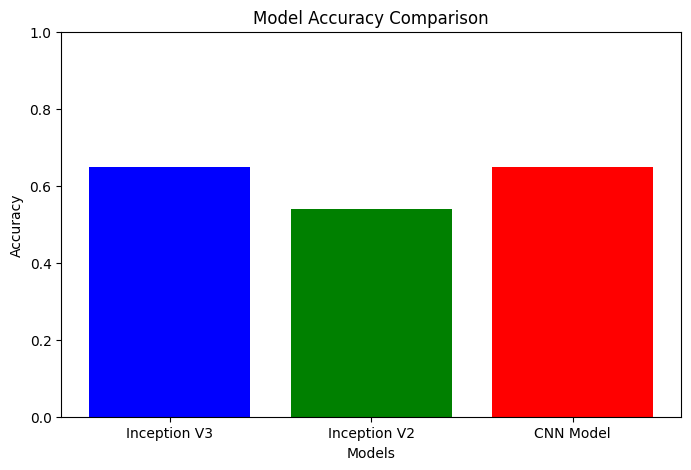

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved models
inception_v3_model = tf.keras.models.load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v3_model.keras')
inception_v2_model = tf.keras.models.load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/inception_v2_model.keras')
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/Diabetic_Retinopathy_CNN_Inception/cnn_model.keras')

# Load the test dataset (Replace with actual test dataset)
# Assuming test images are resized to (299, 299) for Inception models and (224, 224) for CNN
# test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# test_data =validation_generator ,
#     target_size=(299, 299),
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=False)

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Function to evaluate a model and generate confusion matrix
def evaluate_model(model, model_name):
    print(f"\nEvaluating {model_name}...\n")

    # Predict the test data
    y_pred_probs = model.predict(validation_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices
    y_true = validation_generator.classes  # Actual labels

    # Calculate accuracy
    test_loss, test_accuracy = model.evaluate(validation_generator)
    print(f"{model_name} - Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    return test_accuracy

# Evaluate all models and store accuracy
accuracy_v3 = evaluate_model(inception_v3_model, "Inception V3")
accuracy_v2 = evaluate_model(inception_v2_model, "Inception V2")
accuracy_cnn = evaluate_model(cnn_model, "CNN Model")

# Plot comparison of model accuracy
models = ["Inception V3", "Inception V2", "CNN Model"]
accuracies = [accuracy_v3, accuracy_v2, accuracy_cnn]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()
